<a href="https://colab.research.google.com/github/AdamHuang0402/MLclass0423/blob/master/SimpleCNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import ssl
ssl._create_default_https_context = ssl._create_unverified_context

In [ ]:
from keras.datasets.cifar10 import load_data
(x_train, y_train), (x_test, y_test) = load_data()

Using TensorFlow backend.


170500096/170498071 [==============================] - 11s 0us/step


In [ ]:
print(x_train.shape)
print(x_test.shape)

(50000, 32, 32, 3)
(10000, 32, 32, 3)


In [ ]:
trans = ["飛機", "汽車", "鳥", "貓", "鹿",
         "狗", "青蛙", "馬", "船", "卡車"]

船


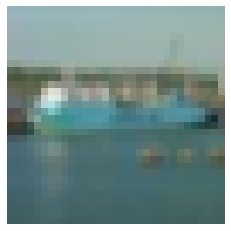

In [ ]:
import random
import matplotlib.pyplot as plt
%matplotlib inline
c = random.randint(0, 49999)
plt.axis("off")
# trans[0] -> 飛機
# XX -> trans[ [0] ]
category = y_train[c][0] 
print(trans[category]) # 將dataset 物件代號 轉化成 文字
plt.imshow(x_train[c])

In [ ]:
# 資料預處理
# 1. 題目預處理(Normalize)
# 卷積不需要攤開, 直接進去
x_train_shape = x_train / 255
x_test_shape = x_test / 255
# DEMO
x_train_shape[0]

array([[[0.23137255, 0.24313725, 0.24705882],
        [0.16862745, 0.18039216, 0.17647059],
        [0.19607843, 0.18823529, 0.16862745],
        ...,
        [0.61960784, 0.51764706, 0.42352941],
        [0.59607843, 0.49019608, 0.4       ],
        [0.58039216, 0.48627451, 0.40392157]],

       [[0.0627451 , 0.07843137, 0.07843137],
        [0.        , 0.        , 0.        ],
        [0.07058824, 0.03137255, 0.        ],
        ...,
        [0.48235294, 0.34509804, 0.21568627],
        [0.46666667, 0.3254902 , 0.19607843],
        [0.47843137, 0.34117647, 0.22352941]],

       [[0.09803922, 0.09411765, 0.08235294],
        [0.0627451 , 0.02745098, 0.        ],
        [0.19215686, 0.10588235, 0.03137255],
        ...,
        [0.4627451 , 0.32941176, 0.19607843],
        [0.47058824, 0.32941176, 0.19607843],
        [0.42745098, 0.28627451, 0.16470588]],

       ...,

       [[0.81568627, 0.66666667, 0.37647059],
        [0.78823529, 0.6       , 0.13333333],
        [0.77647059, 0

In [ ]:

# 2. 答案預處理(One-hot encoding)
# 跟上次一模一樣
from keras.utils.np_utils import to_categorical
y_train_cat = to_categorical(y_train)
y_test_cat = to_categorical(y_test)
# Demo
print("原來:", y_train[1])
print("後來:", y_train_cat[1])

原來: [9]
後來: [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]


In [ ]:
from keras.models import Sequential
# MLP
from keras.layers import Dense, Flatten
# Conv
from keras.layers import Conv2D, MaxPooling2D
cnn = Sequential()
# (一個過濾器) 3 * 3 * 3 * (filter數目) 32 + (bias)32 = 896
cnn.add(Conv2D(32, (3, 3),
               input_shape=(32, 32, 3),
               padding="same",
               activation="relu"))
cnn.add(MaxPooling2D(pool_size=(2, 2)))
# (一個過濾) 3 * 3 * 32 * (filter數目) 64 + (bias) 64 = 18496
cnn.add(Conv2D(64, (3, 3),
               padding="same",
               activation="relu"))
cnn.add(MaxPooling2D(pool_size=(2, 2)))
cnn.add(Conv2D(128, (3, 3),
               padding="same",
               activation="relu"))
cnn.add(MaxPooling2D(pool_size=(2, 2)))
cnn.add(Flatten())
cnn.add(Dense(256, activation="relu"))
cnn.add(Dense(10, activation="softmax"))
cnn.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 16, 16, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 8, 8, 64)          0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 8, 8, 128)         73856     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 4, 4, 128)         0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 2048)             

In [ ]:
# 確定模型訓練方式....等
# 隨機(隨便選一組weights)梯度(正確方向)下降
# loss: 最後輸出一個: binary_crossentropy, 最後輸出多個: categorical_crossentropy
# optimizer: 下降的時候優化 -> 基於動量(我在走的時候不是等速度, 而有速度的累積)
cnn.compile(loss="categorical_crossentropy", 
            metrics=["accuracy"], 
            optimizer="adam")

In [ ]:
# batch: 看幾筆(200)做一次梯度下降(修正)
# epochs: 整份考古題看幾次(10)
# 10個epoch, 200batch: 60000 * 10 / 200 -> 3000(次)

# validation_split=0.1, 1 test，9 train 
# verbose = 2 沒有進度條
# 看 val_loss 判斷是否平滑
cnn.fit(x_train_shape, 
        y_train_cat, 
        batch_size=200, 
        epochs=10, 
        validation_split=0.1)

Train on 45000 samples, validate on 5000 samples
Epoch 1/5
45000/45000 [==============================] - 6s 125us/step - loss: 0.7466 - accuracy: 0.7438 - val_loss: 0.8096 - val_accuracy: 0.7244
Epoch 2/5
45000/45000 [==============================] - 5s 120us/step - loss: 0.6858 - accuracy: 0.7636 - val_loss: 0.7875 - val_accuracy: 0.7300
Epoch 3/5
45000/45000 [==============================] - 5s 120us/step - loss: 0.6249 - accuracy: 0.7853 - val_loss: 0.7578 - val_accuracy: 0.7426
Epoch 4/5
45000/45000 [==============================] - 5s 119us/step - loss: 0.5712 - accuracy: 0.8034 - val_loss: 0.7524 - val_accuracy: 0.7546
Epoch 5/5
45000/45000 [==============================] - 5s 119us/step - loss: 0.5171 - accuracy: 0.8216 - val_loss: 0.7469 - val_accuracy: 0.7584


In [ ]:
# 命中率 73.6%
cnn.evaluate(x_test_shape, y_test_cat)

10000/10000 [==============================] - 2s 155us/step


[0.7908253168106079, 0.7360000014305115]

In [ ]:
# predict: 機率 predict_classes: 分類
# trans = ["飛機", "汽車", "鳥", "貓", "鹿",
#          "狗", "青蛙", "馬", "船", "卡車"]

import pandas as pd
pre = cnn.predict_classes(x_test_shape)
from sklearn.metrics import confusion_matrix
pd.DataFrame(confusion_matrix(y_test, pre))

,0,1,2,3,4,5,6,7,8,9
0,821,17,29,9,19,7,5,9,62,22
1,20,859,3,11,3,4,5,1,25,69
2,96,7,595,58,76,94,34,26,8,6
3,35,10,49,466,70,266,41,34,15,14
4,38,5,57,44,708,48,29,62,8,1
5,21,5,31,88,51,739,13,35,11,6
6,11,3,62,56,36,56,758,3,10,5
7,20,7,35,18,54,72,3,777,4,10
8,57,28,12,11,2,5,2,0,869,14
9,53,92,12,15,1,12,3,13,31,768


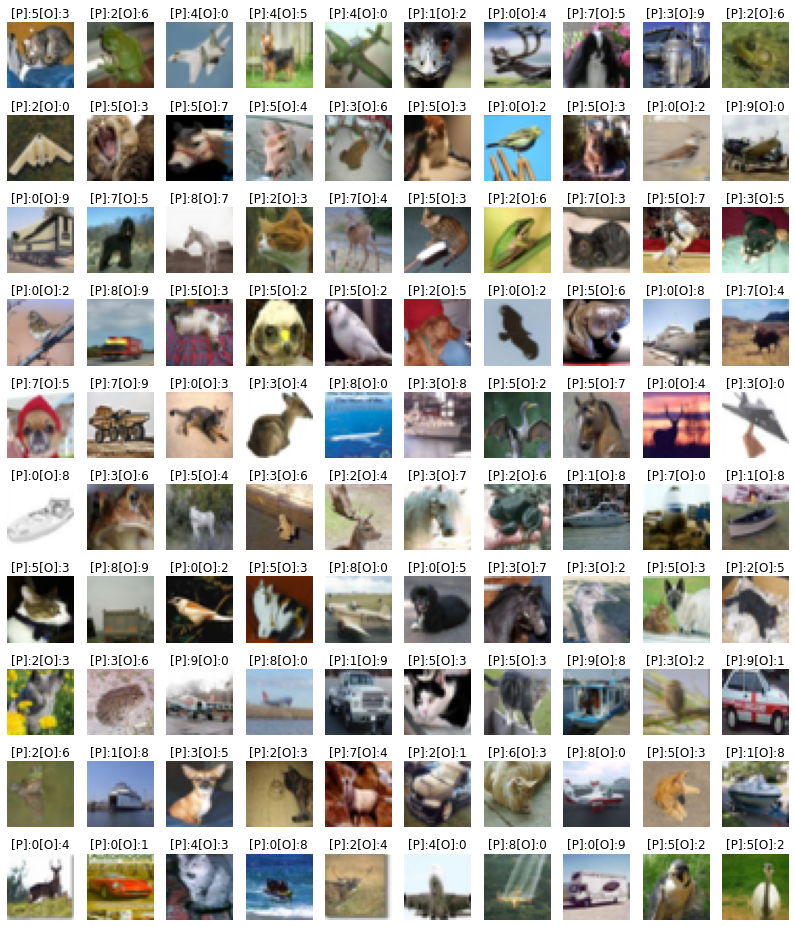

In [ ]:
# numpy才能這樣直接每個數字比較
import numpy as np
# list: list[一個數字]
# numpy array: nparray[ [多個數字] ]

y_dim = y_test.reshape(10000)  # 二維 變 一維
diff = np.nonzero(pre != y_dim)[0]
# 預測錯誤的圖的原本標籤
orifalse = y_dim[diff]
# 預測錯誤的圖的預測標籤
prefalse = pre[diff]
# 把圖拿出來
imgfalse = x_test[diff]
# 整張圖的寬高
plt.figure(figsize=(14, 450))
# 我們每一個列就是10個
width = 10
height = int(len(imgfalse) / 10) + 1
for (i, img) in enumerate(imgfalse[0:100]):
    # (列數, 行數, 第幾張圖(i開始))
    plt.subplot(height, width, i + 1)
    plt.axis("off")
    t = "[P]:" + str(prefalse[i]) + "[O]:" + str(orifalse[i])
    plt.title(t)
    plt.imshow(img)

    # trans = ["飛機", "汽車", "鳥", "貓", "鹿",
#          "狗", "青蛙", "馬", "船", "卡車"]
